Loading the Zip file directly from the Github without the need to download it and Unzip it.

For running the file, click on run button one by one, and for running Histogram Plot, Click on run button two times.

In [1]:
import pandas as pd

url = 'https://github.com/CapitalOneRecruiting/DS/blob/master/transactions.zip?raw=true'
transactions = pd.read_json(url, compression='zip',lines=True)

After the file is loaded, I am checking the data i.e. the Column Names which are included in the file. 

In [2]:
transactions.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

Finding the number of records in the dataset and the size, of the dataset.
From, below output we see that there are "786363" rows and "29" columns

In [3]:
transactions.shape

(786363, 29)

Finding the datatype of each column. From the below output, we see that columns are of different datatype.

int64 - Which means it contains Numeric Integer Value

float64 - Which means it contains Numeric Float value

object - Which means it contains string values

bool - Which means it contains value as True or False

In [4]:
transactions.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

Now, there is possibility that there can be different transactions made with same account. So, for analysis I am finding unique values in each field.

In [5]:
transactions.astype('object').describe(include='all').loc['unique', :]

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
echoBuffer                       1
currentBalance              487318
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch         2
isFraud             

Some additional statistics where I am calculating Minimum value, Maximum Value, Count, Mean and Median (50%) of Columns which are of Numeric (int64 and Float64) DataType.

In [6]:
transactions.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


Finding if any columns contain Null Value or Not:

In [7]:
transactions.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

From, this can come to conclusion that there are no Null Values. But,since some columns are of String DataType, there is a possibility that the cell can be an empty cell with just a space in it.

From the below example we can see that transactionType contains 4 values and one of the value is a space. There are 698 records which contain a space ('') as their value. I will Clean them up during Data Cleaning Step

In [8]:
transactions['transactionType'].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: transactionType, dtype: int64

Exploratory Data Analysis : 

Plotting the Histogram for the column transactionAmount. Here, the x-axis is the "transactionAmount" and the y=axis is the "Count Of transactionAmount". The histogram is divided into 100 bins and x-axis is in the interval of 250 values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015038369C08>]],
      dtype=object)

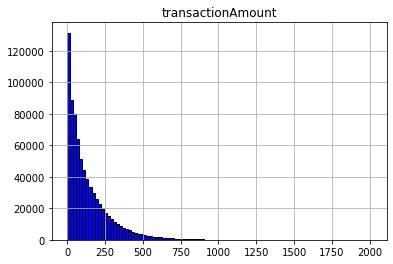

In [49]:
transactions.hist(column='transactionAmount' ,color='blue',edgecolor='black', bins=100)

Analysis of Histogram:

The histogram is Right Skewed. We can see this from Visualizaing the plot. There is another way to determine the Right Skew. We can see from that statistics that the mean of transactionAmount is "136.89" and median of transactionAmount is "87.77". Since, mean is greater than median, the plot is right-skewed.

We see that as we increase the x-axis value, the y-axis value decreases. This means that "As the amount of transaction increases, the count of that transaction goes on decreasing"

From, the plot it is clear that majority of the transaction takes place between values "0" to "250".

Analyzing the top 5 transactions in each "MerchantCategoryCode"

Logic : Here, to analyze top 5 transactions where amount is greater than "0" and less than "250", I am assigning "Id" to each MerchantCategoryCode and then I am grouping it with transactionAmount.

After grouping, I am sorting transactionAmount and MerchantCategoryCode to find the top 5 transactions. I am deleting all other columns for the final result.

In [10]:
temp=transactions[(transactions['transactionAmount']>0) & (transactions['transactionAmount']<=250)].groupby(['transactionAmount'])['merchantCategoryCode'].value_counts().reset_index(name="Count")
temp['MerchantCategoryCode _ Id'] = transactions.groupby(['merchantCategoryCode']).ngroup()

Finding the top 5 transactions in each category and deleting columns which are not needed.

In [11]:
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', None)
temp_1= temp.sort_values(['merchantCategoryCode','transactionAmount'],ascending=False).groupby('merchantCategoryCode').head(5).reset_index()
temp_2=temp_1.drop(['Count','MerchantCategoryCode _ Id'],axis=1)
temp_2


,index,transactionAmount,merchantCategoryCode
0,209917,249.99,subscriptions
1,209905,249.97,subscriptions
2,209875,249.92,subscriptions
3,209860,249.89,subscriptions
4,209818,249.80,subscriptions
5,209916,249.99,rideshare
6,209911,249.98,rideshare
7,209904,249.97,rideshare
8,209891,249.95,rideshare
9,209884,249.94,rideshare


From the above result, We can conclude that, for range of transactionAmount between 0 and 250:
Max TransactionAmount for:
    
subscriptions is 249.99

rideshare is 249.99

personal care is 249.76

online_subscriptions is 22.50

online_retail is 250

online_gifts is 250

mobileapps is 8.95

hotels is 250

health is 249.81

gym is 52.25

furniture is 249.87

fuel is 82.57

food_delivery is 82.31

food is 249.99

fastfood is 250

entertainment is 249.99

cable/phone is 184.70

auto is 250

airline is 249.95

In [12]:
transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


Data Cleaning: Finding Duplicates

A- Finding Reversal Transactions
Logic Used : Reversal Transaction is the one where a transaction of same amount from same merchantName having same merchantCountryCode and type = Reversal occurs after Transaction Type = Purchase.

For eg: Customer A has transaction of 500rs on 1st Jan,2020 at 10:00am with type=Purchase

        Customer A has transaction of 500rs on 1st Jan,2020 at 10:01am with type=Reversal
        
In this case,The 2nd transaction is a Reversal Transaction
        
B - Finding Multi-Swipe Transactions

Logic Used: MultiSwipe Transaction is the one where vendor accidentally charges a customer's card multiple times within a short time span.

For eg: Customer A has transaction of 500rs on 1st Jan,2020 at 10:00am with type=Purchase

        Customer A has transaction of $500 on 1st Jan,2020 at 10:01am with type=Purchase
        
        Customer A has transaction of $500 on 1st Jan,2020 at 10:02am with type=Purchase
        
In this case, 2nd and the 3rd transactions are Multiswipe Transactions


In [13]:
# In this case I am converting transactionDateTime to new_Date and new_Time to fetch Date and Time seperately for GroupBy

transactions['transactionDateTime'] = pd.to_datetime(transactions['transactionDateTime'])
transactions['new_date'] = [d.date() for d in transactions['transactionDateTime']]
transactions['new_time'] = [d.time() for d in transactions['transactionDateTime']]
transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,new_date,new_time
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False,2016-08-13,14:27:32
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False,2016-10-11,05:05:54
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False,2016-11-08,09:18:39
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False,2016-12-10,02:14:50
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False,2016-03-24,21:04:46


Logic Used to Find Duplicates:
Reversal - For this case, I am grouping by 'accountNumber','transactionAmount','merchantName','new_date','transactionDateTime' and then I am assigning rank to the transactionDateTime.

For eg(For Reversal) :  Customer A has transaction of 500rs on 1st Jan,2020 at 10:01am with type=Purchase gets rank 1

         Customer A has transaction of 500rs on 1st Jan,2020 at 10:02am with type=Reversal gets rank 2

Now,since I have grouped by 'accountNumber','transactionAmount','merchantName','new_date','transactionDateTime', it means that to find out using reversal transactions, I have used groupby using above parameters and my extra condition would be that Rank=2 and transactionType= Reversal.

In the above example, my 2nd transaction is a Reversal Transaction.

         
eg 2: (For MultiSwipe):   Customer A has transaction of 500rs on 1st Jan,2020 at 10:01am with type=Purchase gets rank 1

         Customer A has transaction of 500rs on 1st Jan,2020 at 10:02am with type=Purchase gets rank 2
         
         Customer A has transaction of 500rs on 1st Jan,2020 at 10:03am with type=Purchase gets rank 3
         
Now,since I have grouped by 'accountNumber','transactionAmount','merchantName','new_date','transactionDateTime', it means that to find out using multiswipe transactions, I have used groupby using above parameters and my extra condition would be that Rank > 1 and transactionType= Purchase.



In [14]:
transactions['rank'] = transactions.groupby(['accountNumber','transactionAmount','merchantName','new_date'])['transactionDateTime'].rank(method='min').astype(int)
transactions.head(15)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,new_date,new_time,rank
0,737265056,737265056,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.00,,,,False,,,False,False,2016-08-13,14:27:32,1
1,737265056,737265056,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,True,,,False,False,2016-10-11,05:05:54,1
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False,2016-11-08,09:18:39,1
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False,2016-12-10,02:14:50,1
4,830329091,830329091,5000,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False,2016-03-24,21:04:46,1
5,830329091,830329091,5000,5000.00,2016-04-19 16:24:27,30.76,In-N-Out #422833,US,US,02,01,fastfood,01/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False,2016-04-19,16:24:27,1
6,830329091,830329091,5000,5000.00,2016-05-21 14:50:35,57.28,Krispy Kreme #685312,US,US,02,01,fastfood,05/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False,2016-05-21,14:50:35,1
7,830329091,830329091,5000,5000.00,2016-06-03 00:31:21,9.37,Shake Shack #968081,US,US,05,01,fastfood,01/2021,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False,2016-06-03,00:31:21,1
8,830329091,830329091,5000,4990.63,2016-06-10 01:21:46,523.67,Burger King #486122,,US,02,01,fastfood,08/2032,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,9.37,,,,True,,,False,False,2016-06-10,01:21:46,1
9,830329091,830329091,5000,5000.00,2016-07-11 10:47:16,164.37,Five Guys #510989,US,US,05,08,fastfood,04/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False,2016-07-11,10:47:16,1


In [15]:
# Finding out Reversal Transactions

x_reverse = transactions.loc[(transactions['rank'] == 2) & (transactions['transactionType']=='REVERSAL')]
x_reverse

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,new_date,new_time,rank
39,574788567,574788567,2500,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,09,01,auto,10/2021,2015-10-13,2015-10-13,206,206,8522,REVERSAL,,299.02,,,,True,,,False,False,2016-05-24,01:38:03,2
133,984504651,984504651,50000,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,05,01,health,08/2028,2015-07-27,2015-07-27,640,640,8332,REVERSAL,,3632.59,,,,False,,,False,False,2016-01-16,09:53:15,2
200,984504651,984504651,50000,36452.49,2016-02-12 05:10:49,34.92,Golds Gym #747443,US,US,09,01,health,03/2028,2015-07-27,2015-07-27,640,640,8332,REVERSAL,,13547.51,,,,False,,,False,False,2016-02-12,05:10:49,2
468,984504651,984504651,50000,12228.86,2016-06-05 13:39:15,234.45,Regal Cinemas #729464,US,US,02,01,entertainment,08/2024,2015-07-27,2016-05-05,640,640,8332,REVERSAL,,37771.14,,,,True,,,False,False,2016-06-05,13:39:15,2
735,984504651,984504651,50000,2715.49,2016-09-28 07:09:09,36.74,WSC #162278,US,US,02,01,health,06/2022,2015-07-27,2016-06-25,640,640,8332,REVERSAL,,47284.51,,,,False,,,False,False,2016-09-28,07:09:09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785544,841351704,841351704,50000,20269.51,2016-12-07 00:29:09,67.98,Washington News,US,US,09,01,subscriptions,04/2030,2015-12-17,2015-12-17,651,651,7831,REVERSAL,,29730.49,,,,False,,,False,False,2016-12-07,00:29:09,2
785576,841351704,841351704,50000,15986.98,2016-12-22 22:27:25,52.69,Washington Times,US,US,05,01,subscriptions,02/2024,2015-12-17,2015-12-17,651,651,7831,REVERSAL,,34013.02,,,,False,,,False,False,2016-12-22,22:27:25,2
785587,841351704,841351704,50000,13979.93,2016-12-27 18:13:11,206.92,NY News,US,US,02,01,subscriptions,08/2027,2015-12-17,2015-12-17,651,651,7831,REVERSAL,,36020.07,,,,True,,,False,False,2016-12-27,18:13:11,2
786014,205026043,205026043,5000,1571.26,2016-09-18 06:08:02,56.26,Lyft,US,US,05,01,rideshare,07/2031,2008-04-15,2008-04-15,359,359,258,REVERSAL,,3428.74,,,,False,,,False,False,2016-09-18,06:08:02,2


From the above Result, Number of Reversal Transactions is "5678"

Finding the MultiSwipe Transactions:

In [16]:
y_multiswipe1 = transactions.loc[(transactions['rank'] > 1) & (transactions['transactionType']=='PURCHASE')]
y_multiswipe1

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,new_date,new_time,rank
263,984504651,984504651,50000,26680.99,2016-03-12 06:34:29,118.52,AMC #706324,US,US,02,01,entertainment,10/2024,2015-07-27,2015-07-27,640,640,8332,PURCHASE,,23319.01,,,,True,,,False,False,2016-03-12,06:34:29,2
264,984504651,984504651,50000,26562.47,2016-03-12 06:36:41,118.52,AMC #706324,US,US,02,01,entertainment,10/2024,2015-07-27,2015-07-27,640,640,8332,PURCHASE,,23437.53,,,,True,,,False,False,2016-03-12,06:36:41,3
281,984504651,984504651,50000,24316.12,2016-03-18 13:57:04,26.71,Planet Fitness #692929,US,US,02,01,health,10/2024,2015-07-27,2015-07-27,640,640,8332,PURCHASE,,25683.88,,,,True,,,False,False,2016-03-18,13:57:04,2
339,984504651,984504651,50000,16503.49,2016-04-08 22:21:11,43.21,WSC #994275,US,US,02,08,health,02/2030,2015-07-27,2016-03-26,640,640,8332,PURCHASE,,33496.51,,,,False,,,False,False,2016-04-08,22:21:11,2
413,984504651,984504651,50000,7302.32,2016-05-07 07:32:54,23.82,Golds Gym #846582,US,US,09,01,health,12/2030,2015-07-27,2016-05-05,640,640,8332,PURCHASE,,42697.68,,,,True,,,False,False,2016-05-07,07:32:54,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785758,207667444,207667444,7500,6893.70,2016-10-14 13:24:58,79.82,discount.com,US,US,02,01,online_retail,03/2025,2011-12-12,2016-08-16,235,235,9853,PURCHASE,,606.30,,,,False,,,False,False,2016-10-14,13:24:58,2
785915,428856030,428856030,250,104.44,2016-10-30 20:59:18,314.07,Rodeway Inn #438868,US,US,02,01,hotels,02/2027,2009-08-17,2009-08-17,990,990,7660,PURCHASE,,145.56,,,,True,,,False,False,2016-10-30,20:59:18,2
785983,205026043,205026043,5000,451.59,2016-06-07 22:29:11,391.94,Uber,US,US,09,08,rideshare,12/2029,2008-04-15,2008-04-15,198,198,3931,PURCHASE,,4548.41,,,,False,,,False,False,2016-06-07,22:29:11,2
785984,205026043,205026043,5000,433.52,2016-06-07 22:30:57,391.94,Uber,US,US,09,08,rideshare,12/2029,2008-04-15,2008-04-15,198,198,3931,PURCHASE,,4566.48,,,,False,,,False,False,2016-06-07,22:30:57,3


From, the above result, Number of Multi-Swipe Transactions is 7445

In [17]:
sumAmount=y_multiswipe1['transactionAmount'].sum()
print(sumAmount)

1102145.06


In [18]:
sumReverse=x_reverse['transactionAmount'].sum()
print(sumReverse)

822499.27


Number of Reversal Transactions = 5678

Number of MultiSwipe Transactions = 7445

Total Amount for Reversed Transactions = $8,22,499.27

Total Amount for MultiSwipe Transactions = $ 11,02,145


Data Cleaning:

Since, the reversed and the multiswipe transactions were duplicates, I have removed them as a part of Data Cleaning process which would be helpful to build a predictive model

In [19]:
transactions=transactions[transactions['rank']== 1]
transactions

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,new_date,new_time,rank
0,737265056,737265056,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.00,,,,False,,,False,False,2016-08-13,14:27:32,1
1,737265056,737265056,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,True,,,False,False,2016-10-11,05:05:54,1
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False,2016-11-08,09:18:39,1
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False,2016-12-10,02:14:50,1
4,830329091,830329091,5000,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False,2016-03-24,21:04:46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1095.04,,,,False,,,False,False,2016-12-22,18:44:12,1
786359,732852505,732852505,50000,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1214.96,,,,False,,,False,False,2016-12-25,16:20:34,1
786360,732852505,732852505,50000,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1233.85,,,,False,,,False,False,2016-12-27,15:46:24,1
786361,732852505,732852505,50000,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1283.28,,,,False,,,False,False,2016-12-29,00:30:55,1


Dropping Irrelevant Columns:

While Building a predictive Model, I am taking only those columns which contain important data and am droping the columns which are of not that much importance and the columns which contain no values.
For eg: 'merchantCity','merchantState','merchantZip','recurringAuthInd' contain no value in tehir field.
         'enteredCVV' is the same as 'CardCvv', so I am droping it.

I am dropping 'merchantName' because there is 'merchantCategoryCode' which would indirectly be a link to the mechantName. And plus, merchantName contain many values, so it would be better to drop that column.

In [20]:
transactions=transactions.drop(['merchantCity','merchantState','merchantZip','recurringAuthInd','posOnPremises'],axis=1)
transactions=transactions.drop(['merchantName','currentBalance','accountOpenDate','enteredCVV','cardLast4Digits'],axis=1)

In [21]:
transactions.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'dateOfLastAddressChange',
       'cardCVV', 'transactionType', 'echoBuffer', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'new_date', 'new_time', 'rank'],
      dtype='object')

As we saw in step 8, that there are some columns which contains space ('') as their values. So, here I am taking that columns and replacing space with NAN, and then I am dropping the rows where the value is NA.

In [22]:
import numpy as np
transactions['posEntryMode'].replace('', np.nan, inplace=True)
transactions['merchantCountryCode'].replace('', np.nan, inplace=True)
transactions['posConditionCode'].replace('', np.nan, inplace=True)

In [23]:
transactions.dropna(subset=['posEntryMode'], inplace=True)
transactions.dropna(subset=['merchantCountryCode'], inplace=True)
transactions.dropna(subset=['posConditionCode'], inplace=True)

In [24]:
transactions.shape

(767719, 22)

In [25]:
transactions.dtypes

accountNumber                        int64
customerId                           int64
creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate                      object
dateOfLastAddressChange             object
cardCVV                              int64
transactionType                     object
echoBuffer                          object
cardPresent                           bool
expirationDateKeyInMatch              bool
isFraud                               bool
new_date                            object
new_time                            object
rank                                 int32
dtype: object

For building a predictive model, the datatype of the variables i.e. the training and the target dataset should be numerical.

Here I am converting the datatype of 'posEntryMode' and 'posConditionCode' to float from object

In [26]:
transactions["posEntryMode"] = transactions.posEntryMode.astype(float)
transactions["posConditionCode"] = transactions.posEntryMode.astype(float)
transactions.dtypes

accountNumber                        int64
customerId                           int64
creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
acqCountry                          object
merchantCountryCode                 object
posEntryMode                       float64
posConditionCode                   float64
merchantCategoryCode                object
currentExpDate                      object
dateOfLastAddressChange             object
cardCVV                              int64
transactionType                     object
echoBuffer                          object
cardPresent                           bool
expirationDateKeyInMatch              bool
isFraud                               bool
new_date                            object
new_time                            object
rank                                 int32
dtype: object

For currentExpDate and dateOfLastAddressChange, I am splitting it to Year, Month and Day column, so that it would be easy for me to fetch the Year column and then convert it's datatype from Object to Float

In [27]:
transactions[['Month_of_Expiration_Date','Year_of_Expiration_Date']] = transactions.currentExpDate.str.split("/",expand=True)

transactions[['Year_of_LastAdressChange','Month_of_LastAdressChange','Day']] = transactions.dateOfLastAddressChange.str.split("-",expand=True)


Dropping Irrelevant Columns

In [28]:
transactions=transactions.drop(['Month_of_LastAdressChange','Day','Month_of_Expiration_Date','currentExpDate','dateOfLastAddressChange','rank','new_date','new_time','transactionType','transactionDateTime','acqCountry'],axis=1)


In [29]:
transactions.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionAmount', 'merchantCountryCode', 'posEntryMode',
       'posConditionCode', 'merchantCategoryCode', 'cardCVV', 'echoBuffer',
       'cardPresent', 'expirationDateKeyInMatch', 'isFraud',
       'Year_of_Expiration_Date', 'Year_of_LastAdressChange'],
      dtype='object')

In [30]:
transactions=transactions.drop(['customerId','echoBuffer'],axis=1)


In [31]:
transactions.dtypes

accountNumber                 int64
creditLimit                   int64
availableMoney              float64
transactionAmount           float64
merchantCountryCode          object
posEntryMode                float64
posConditionCode            float64
merchantCategoryCode         object
cardCVV                       int64
cardPresent                    bool
expirationDateKeyInMatch       bool
isFraud                        bool
Year_of_Expiration_Date      object
Year_of_LastAdressChange     object
dtype: object

Converting Data Type from Object to Float, becasue all the variables should be of numeric datatype to build a predictive Model

In [32]:
transactions["Year_of_Expiration_Date"] = transactions.Year_of_Expiration_Date.astype(float)
transactions["Year_of_LastAdressChange"] = transactions.Year_of_LastAdressChange.astype(float)

In [33]:
transactions.dtypes

accountNumber                 int64
creditLimit                   int64
availableMoney              float64
transactionAmount           float64
merchantCountryCode          object
posEntryMode                float64
posConditionCode            float64
merchantCategoryCode         object
cardCVV                       int64
cardPresent                    bool
expirationDateKeyInMatch       bool
isFraud                        bool
Year_of_Expiration_Date     float64
Year_of_LastAdressChange    float64
dtype: object

Feature Extraction:

Performing ONE HOT Encoding by creating a dummy variable.

I am performing this step because 'merchantCountryCode' and 'merchantCategoryCode' contained non-numeric value having datatype object. After performing One Hot Encoding and creating a dummy variable, I am able to use the value those columns as different columns.
For eg: Value as US in merchantCountryCode is converted to a column (merchantCountryCode_US) having value as 0 or 1

In [34]:

transactions=pd.get_dummies(transactions, columns=["merchantCountryCode"])
transactions=pd.get_dummies(transactions, columns=["merchantCategoryCode"])
transactions.head()

,accountNumber,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,cardPresent,expirationDateKeyInMatch,isFraud,Year_of_Expiration_Date,Year_of_LastAdressChange,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions
0,737265056,5000,5000.0,98.55,2.0,2.0,414,False,False,False,2023.0,2015.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,737265056,5000,5000.0,74.51,9.0,9.0,486,True,False,False,2024.0,2015.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,737265056,5000,5000.0,7.47,9.0,9.0,486,False,False,False,2025.0,2015.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,737265056,5000,5000.0,7.47,9.0,9.0,486,False,False,False,2025.0,2015.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,830329091,5000,5000.0,71.18,2.0,2.0,885,True,False,False,2029.0,2015.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
transactions.dtypes

accountNumber                                  int64
creditLimit                                    int64
availableMoney                               float64
transactionAmount                            float64
posEntryMode                                 float64
posConditionCode                             float64
cardCVV                                        int64
cardPresent                                     bool
expirationDateKeyInMatch                        bool
isFraud                                         bool
Year_of_Expiration_Date                      float64
Year_of_LastAdressChange                     float64
merchantCountryCode_CAN                        uint8
merchantCountryCode_MEX                        uint8
merchantCountryCode_PR                         uint8
merchantCountryCode_US                         uint8
merchantCategoryCode_airline                   uint8
merchantCategoryCode_auto                      uint8
merchantCategoryCode_cable/phone              

Now as you see from below example, the transactions sheet contains data where with majority of Non-Fraud values. If we take the whole dataset into account, our result would be biased towards Non-Fraud transactions.


In [36]:
print('Number of No Fraud transaction = ',(transactions['isFraud'].value_counts()[0]))
print('Number of Fraud transaction = ',(transactions['isFraud'].value_counts()[1]))

print('No Frauds transaction consists of', round(transactions['isFraud'].value_counts()[0]/len(transactions) * 100,2), '% of the dataset')
print('Frauds transaction consists of', round(transactions['isFraud'].value_counts()[1]/len(transactions) * 100,2), '% of the dataset')


Number of No Fraud transaction =  755903
Number of Fraud transaction =  11816
No Frauds transaction consists of 98.46 % of the dataset
Frauds transaction consists of 1.54 % of the dataset


To nullify the bias, I am taking equal number of Fraud and Non-Fraud transactions and applying my model on the new dataset.
That is I am creating a sample data which equal number of Fraud and NonFraud transactions.

In [37]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time


transactions = transactions.sample(frac=1)

# amount of fraud classes 11816 rows.
fraud_df = transactions.loc[transactions['isFraud'] == 1]
non_fraud_df = transactions.loc[transactions['isFraud'] == 0][:11816]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df



,accountNumber,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,cardPresent,expirationDateKeyInMatch,isFraud,Year_of_Expiration_Date,Year_of_LastAdressChange,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions
156329,861261988,7500,4170.64,37.92,9.0,9.0,819,True,False,False,2023.0,2014.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
238682,330133277,1000,235.57,276.99,9.0,9.0,133,False,False,True,2025.0,2014.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
91901,677798877,15000,7946.25,109.28,2.0,2.0,292,False,False,False,2033.0,2016.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
465271,329748605,10000,5831.45,19.07,2.0,2.0,409,False,False,True,2026.0,2014.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
606943,599847715,2500,1495.59,316.91,9.0,9.0,243,False,False,False,2023.0,2016.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602177,208923447,20000,3036.06,6.09,9.0,9.0,586,False,False,False,2032.0,2013.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
714717,955040304,7500,3237.00,25.79,2.0,2.0,236,False,False,False,2032.0,2014.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
154231,700725639,50000,34693.06,249.32,2.0,2.0,926,False,False,True,2026.0,2016.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
383788,213244290,2500,1177.82,196.37,9.0,9.0,393,False,False,True,2025.0,2014.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


My target variable is "isFraud" column

For the training Dataset i.e. X, I am dropping isFraud column.

After that, I am applying RandomForestModel and XGB model.

For RandomForest Model, I am dividing the dataset into 70/30 ratio, which means 70% of my data would be for training and 30% of my data would be for testing.

I have done this by (test_size=0.3)

I have taken max_features which determines the maximum number of features to be condsidered for splitting as 'sqrt'.

For measuring my accuracy, I have computed auc curve



For XGB Model, I have split the training and the testing dataset into 80/20 ration respectively.


In [38]:

X = new_df.drop('isFraud', axis=1)
y = new_df['isFraud']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [40]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[2561  981]
 [ 920 2628]]
              precision    recall  f1-score   support

       False       0.74      0.72      0.73      3542
        True       0.73      0.74      0.73      3548

    accuracy                           0.73      7090
   macro avg       0.73      0.73      0.73      7090
weighted avg       0.73      0.73      0.73      7090

Accuracy: 73.19%


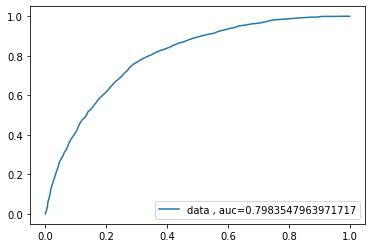

In [43]:
from sklearn import metrics
yproba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  yproba)
auc = metrics.roc_auc_score(y_test, yproba)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [45]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
y_pred_new = model.predict(X_test)
predictions = [round(value) for value in y_pred_new]

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_new))
print(classification_report(y_test,y_pred_new))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[1687  671]
 [ 707 1662]]
              precision    recall  f1-score   support

       False       0.70      0.72      0.71      2358
        True       0.71      0.70      0.71      2369

    accuracy                           0.71      4727
   macro avg       0.71      0.71      0.71      4727
weighted avg       0.71      0.71      0.71      4727

Accuracy: 70.85%


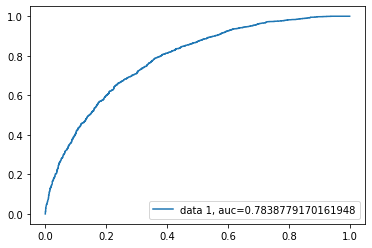

In [48]:
from sklearn import metrics
y_new_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_new_proba)
auc = metrics.roc_auc_score(y_test, y_new_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Form the above two models, I see that RandomForest Classifier performs better than XGB Classifier.

Factors that I took into consideration to evaluate the performance of the RandomForestmodel are:

Accuracy - 73.19%

F1-Score - 0.73

AUC  - 0.80

Factors that I took into consideration to evaluate the performance of the XGB Model are:

Accuracy - 70.85%

F1-Score - 0.71

AUC- 0.78

For building this model, I chose to use Under Sampling, sice the dataset was imbalanced. If I had considered the whole dateset for building th model, there would be more bias towards non-fraudulent transactions since it consists of 98.5% of the data.

I implemented RandomForest Algorithm because,since I am bootstrapping samples, I would take a resample of training data set. Then I would be able to rebuild classification trees on each of those bootstrap samples. I am considering only a subset of variable at each potential split. My idea was to grow large number of trees along with diverse set of potential trees that can be built. For prediction, I am averaging those trees in order to get the prediction for a new outcome.


I implemented XGB Classifier, because it would help me to build a series of decision trees and I would be able to train each tree so that it attempts to correct the mistake of the previous trees in the series.

Since, the dataset is an imbalanced dataset, I chose to calculate F1-Score and AUC because accuracy is not that good metric to check performance of the model for imbalanced dataset.



The features that I found were important for building the model were transactionAmount, creditLimit, Year of Expiration Date,Was the card present at transaction time or not,MerchantCategoryCode,cardCVV,posEntryMode.

